# Sentence Embedding


## Averaging Word Embeddings

In [24]:
# สร้าง Sentence Embeddings จาก Averaging Word Embeddings

import numpy as np

def average_word_embeddings(sentence, word_embeddings):
  """
  Generates a sentence embedding by averaging word embeddings.

  Args:
    sentence: A string representing the sentence.
    word_embeddings: A dictionary mapping words to their vector representations.

  Returns:
    A numpy array representing the sentence embedding, or None if no words in the sentence are found in the embeddings.
  """
  words = sentence.split()
  word_vectors = []
  for word in words:
    if word in word_embeddings:
      word_vectors.append(word_embeddings[word])

  if not word_vectors:  # กรณีที่ไม่มีคำใดอยู่ใน word embedding เลย
    return None

  return np.mean(word_vectors, axis=0)


# ตัวอย่างการใช้งาน (ในการใช้งานจริง ให้ใช้ค่าที่ได้จาก pre-trained word embedding หรือที่เทรนขึ้นมาใช้งานเอง)
word_embeddings = {
    "สร้าง": np.array([0.1, 0.2, 0.3]),
    "Sentence": np.array([0.4, 0.5, 0.6]),
    "Embeddings": np.array([0.7, 0.8, 0.9]),
    "โดย": np.array([0.1, 0.3, 0.5]),
    "การ": np.array([0.2, 0.4, 0.6])
}


sentence = "สร้าง Sentence Embeddings โดย การ เฉลี่ย Word Embeddings"
sentence_embedding = average_word_embeddings(sentence, word_embeddings)

if sentence_embedding is not None:
  print(sentence_embedding)
else:
  print("No words in the sentence were found in the provided word embeddings.")

[0.36666667 0.5        0.63333333]


In [25]:
# Download the pre-trained Word2Vec model
import gensim.downloader as api
model_w2v = api.load('word2vec-google-news-300')

In [26]:
# ตัวอย่างการใช้งานจาก pre-trained word embedding

sentence = "This is a sample sentence for testing."
sentence_embedding = average_word_embeddings(sentence, model_w2v)

if sentence_embedding is not None:
  print(len(sentence_embedding))
  print(sentence_embedding)
else:
  print("No words in the sentence were found in the provided word embeddings.")

300
[-0.07545777 -0.01582031  0.19799805 -0.03222656  0.01022949  0.1211914
  0.05881958 -0.08261719  0.04697265  0.12888184 -0.08759765 -0.10703125
  0.02529297  0.05195313 -0.02726746  0.26582032  0.07905273  0.09742431
 -0.08310547 -0.18100587 -0.0697998   0.09422608 -0.05268555 -0.00778809
  0.07387695 -0.15390626 -0.14545898  0.07845764  0.03062744  0.17993164
 -0.01101685 -0.06768799 -0.04472656  0.11616211  0.08886719  0.1409607
 -0.13935547 -0.00571289  0.01479492  0.07229004  0.0519043   0.07453613
 -0.03540649 -0.04814453 -0.00720215 -0.08751221 -0.10441895  0.11474609
 -0.03852539  0.07433929  0.02565918 -0.01591797  0.01630859 -0.07409668
  0.04951172 -0.0086792   0.06708984 -0.0522644  -0.06349488 -0.02973633
 -0.02558594 -0.07448731 -0.05844726 -0.14399414  0.01186523 -0.02792969
  0.03579102 -0.11274414 -0.06738281 -0.00244141  0.12568359 -0.03808594
  0.09804688 -0.03001709 -0.00717773 -0.01593018  0.06220703  0.05629883
  0.13668212  0.17954102 -0.00195312 -0.1451172  

In [27]:
# Example usage หาค่าความคล้ายคลึงกันของประโยค เช่นพวกแอพที่เาไว้เช็คว่ามีการลอกกันของการบ้านไหม หรือจัดกลุ่มเอกสาร
sentences = [
    "This is an example sentence.",
    "Another sentence for comparison.",
    "A completely different topic.",
    "This sentence is similar to the first one."
]

sentence_embeddings = []
for sentence in sentences:
  embedding = average_word_embeddings(sentence, model_w2v)
  if embedding is not None:
    sentence_embeddings.append(embedding)
  else:
      print(f"Warning: No words in the sentence '{sentence}' were found in the provided word embeddings.")

print(len(sentence_embeddings))
print(sentence_embeddings[0])

4
[ 1.22604370e-02  7.92980194e-02  1.09313965e-01  5.51757812e-02
 -1.60583496e-01  1.20300293e-01  1.22253418e-01 -1.42089844e-01
  5.93528748e-02  8.04138184e-02 -5.58471680e-02 -1.08367920e-01
  1.95312500e-03 -1.98364258e-02 -1.20544434e-02  1.84242249e-01
  5.12695312e-02  5.07659912e-02 -9.88769531e-02 -9.97619629e-02
  5.05828857e-02  1.07177734e-01 -1.59912109e-02 -4.21142578e-02
  2.40488052e-02 -4.74243164e-02 -4.98657227e-02  1.55151367e-01
 -1.45874023e-02  1.67602539e-01  7.97729492e-02 -2.40478516e-02
 -2.92358398e-02  5.01708984e-02  9.00878906e-02  1.25656128e-02
 -1.38305664e-01  1.81884766e-02  9.57031250e-02 -1.55029297e-02
  4.26025391e-02  8.20922852e-02 -6.47583008e-02  1.53198242e-02
  3.71093750e-02 -2.91900635e-02 -5.13610840e-02  9.73510742e-02
  3.10058594e-02 -5.71289062e-02  3.85131836e-02  2.44140625e-03
  1.05590820e-01 -1.03416443e-01  1.03515625e-01  6.44531250e-02
  5.20019531e-02 -1.06376648e-01  6.54907227e-02  3.80859375e-02
 -1.44226074e-01  6.033

In [28]:
# ทดลองนำไปใช้งานในการเปรียบเทียบความคล้ายคลึงกันระหว่างประโยค

from sklearn.metrics.pairwise import cosine_similarity

# เปรียบเทียบความคล้ายคลึงกัน
avg_similarities = []
print("Similarity")
for i in range(len(sentences)):
    for j in range(i + 1, len(sentences)):
        if sentence_embeddings[i] is not None and sentence_embeddings[j] is not None:
            similarity = cosine_similarity([sentence_embeddings[i]], [sentence_embeddings[j]])
            avg_similarities += [similarity[0][0]]
            print(f"'{sentences[i]} - {sentences[j]}': {similarity[0][0]}")

Similarity
'This is an example sentence. - Another sentence for comparison.': 0.49455690383911133
'This is an example sentence. - A completely different topic.': 0.40593600273132324
'This is an example sentence. - This sentence is similar to the first one.': 0.6697951555252075
'Another sentence for comparison. - A completely different topic.': 0.2756061553955078
'Another sentence for comparison. - This sentence is similar to the first one.': 0.7713748216629028
'A completely different topic. - This sentence is similar to the first one.': 0.4583456516265869


## Universal Sentence Encoder (USE)

In [29]:
# sentence embedding โดย Universal Sentence Encoder (USE):

import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

# Load the Universal Sentence Encoder module
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model_use = hub.load(module_url)

def embed_sentence(sentence):
  """Embeds a sentence using the Universal Sentence Encoder."""
  return model_use([sentence])[0].numpy()

# Example usage
sentence = "สร้าง Sentence Embeddings โดย การ เฉลี่ย Word Embeddings"
embedding = embed_sentence(sentence)
print(len(embedding))
print(embedding)

512
[ 2.06803232e-02 -4.05717120e-02 -4.41381568e-03  3.45443152e-02
 -2.98719872e-02 -3.08643784e-02  4.65194955e-02 -4.85262647e-02
 -2.68626530e-02  7.03865588e-02  2.06666309e-02  6.36127070e-02
  2.38072500e-02  1.64214335e-02 -5.04564084e-02 -9.87571329e-02
 -3.93919311e-02 -4.71412614e-02  6.87684640e-02 -4.33610715e-02
 -2.75788885e-02 -2.33970266e-02 -5.43627739e-02  1.68356020e-02
 -7.54319727e-02  6.43518567e-02 -2.46498398e-02 -2.12377403e-02
 -7.29680136e-02  5.23965955e-02  2.91614681e-02 -1.75962392e-02
 -6.56680837e-02 -3.26761492e-02 -7.98671618e-02 -8.04636069e-03
  4.17784527e-02  1.55995777e-02 -8.30460116e-02  2.70820614e-02
 -2.82869302e-03  2.07416760e-03  2.37944629e-02  3.93229909e-02
 -1.67499855e-02  2.53583118e-03  3.36585529e-02  5.92414066e-02
  1.18483789e-02  2.18041316e-02  1.92676261e-02 -2.81729326e-02
 -9.97961089e-02 -8.27445462e-02 -5.77178523e-02 -4.79172505e-02
  5.97692048e-03  2.72374861e-02  5.77180907e-02  8.78528971e-03
 -7.22610429e-02  1.3

In [30]:
# Example usage
sentences = [
    "This is an example sentence.",
    "Another sentence for comparison.",
    "A completely different topic.",
    "This sentence is similar to the first one.",
]

sentence_encoders = []
for sentence in sentences:
  embedding = embed_sentence(sentence)
  if embedding is not None:
    sentence_encoders.append(embedding)
  else:
      print(f"Warning: No words in the sentence '{sentence}' were found in the provided word embeddings.")

print(len(sentence_encoders))
print(sentence_encoders[0])

4
[ 6.23825826e-02  2.08216850e-02  3.80545133e-03  2.92493533e-02
 -7.32270256e-02 -1.97312445e-03 -1.66500490e-02  3.30244675e-02
  6.92790328e-03  5.26215136e-02 -1.02989385e-02 -1.13194678e-02
 -6.23090751e-03  1.00084186e-01  1.80095732e-02 -9.93793309e-02
 -1.39244674e-02 -1.76650137e-02 -4.52030376e-02 -5.56310900e-02
  7.91292116e-02  3.78863290e-02 -1.52980918e-02 -5.07262768e-03
 -5.49592972e-02  7.23988861e-02  2.90205274e-02 -5.82795814e-02
 -5.40220179e-03 -1.69340763e-02  2.15250328e-02  8.37886706e-03
  5.60171856e-03 -1.65353734e-02 -9.10105407e-02 -2.74207406e-02
  5.25665246e-02  7.65372440e-03  6.13667537e-04 -2.69716755e-02
  4.83600376e-03  2.30624210e-02  6.15627095e-02  7.88372830e-02
 -5.29996753e-02 -3.27655710e-02  2.29131449e-02 -2.13254169e-02
 -2.20250897e-02  1.78520009e-02  2.50900928e-02 -6.34129643e-02
 -1.00854211e-01 -1.90065783e-02 -2.80478429e-02 -1.85554810e-02
 -6.91876262e-02  3.61712798e-02 -5.96615970e-02 -3.40971239e-02
  8.63479637e-03 -5.855

In [31]:
# ทดลองนำไปใช้งานในการเปรียบเทียบความคล้ายคลึงกันระหว่างประโยค

from sklearn.metrics.pairwise import cosine_similarity

USE_similarities = []
# เปรียบเทียบความคล้ายคลึงกัน
print("Similarity")
for i in range(len(sentences)):
    for j in range(i + 1, len(sentences)):
        if sentence_encoders[i] is not None and sentence_encoders[j] is not None:
            similarity = cosine_similarity([sentence_encoders[i]], [sentence_encoders[j]])
            USE_similarities += [similarity[0][0]]
            print(f"'{sentences[i]} - {sentences[j]}': {similarity[0][0]}")

Similarity
'This is an example sentence. - Another sentence for comparison.': 0.4855540990829468
'This is an example sentence. - A completely different topic.': 0.1737837791442871
'This is an example sentence. - This sentence is similar to the first one.': 0.5542752146720886
'Another sentence for comparison. - A completely different topic.': 0.23885074257850647
'Another sentence for comparison. - This sentence is similar to the first one.': 0.33028101921081543
'A completely different topic. - This sentence is similar to the first one.': 0.13928022980690002


อธิปรายผลการเปรียบเทียบความคล้ายคลึงระหว่าง Average Word Embedding และ Universal Sentence Encoder (USE)

*   USE ให้ค่าความเปรียบเทียบความคล้ายคลึงที่สูงกว่า มีความแม่นยำกว่า Average Word Embedding


ข้อดีและข้อเสียของแต่ละวิธี

*   Average Word Embedding

ข้อดี
*   ใช้งานง่ายและรวดเร็ว

ข้อเสีย
*   จับความหมายไม่แม่นยำเท่าUSE
*   ถ้าในประโยคไม่มีคำที่อยู่ในพจนานุกรม Average Word Embedding จะไม่รู้ว่าจะแทนคำนั้นด้วยตัวเลขอะไร ทำให้ความหมายของประโยคผิดเพี้ยน หรือค่าความคล้ายคลึงกับประโยคอื่นๆอาจคาดเคลื่อน


*   Universal Sentence Encoder
ข้อดี
*   เข้าใจประโยคได้ดีกว่า
*   ถึงจะเจอคำศัพท์ที่ไม่มีในคลัง แต่ก็ยังสามารถเดาความหมายได้ จากคำศัพท์อื่นๆ ในประโยคและโครงสร้างของประโยค

ข้อเสีย
*   ใช้งานซับซ้อนกว่าAverage Word Embedding


ทดลองใช้ Multilingual Universal Sentence Encoder หาความเหมือนของประโยคข้ามภาษา

ที่มา: [ตรวจสอบความถูกต้องของการแปล ด้วย Universal Sentence Encoder](https://medium.com/airesearch-in-th/%E0%B8%95%E0%B8%A3%E0%B8%A7%E0%B8%88%E0%B8%AA%E0%B8%AD%E0%B8%9A%E0%B8%84%E0%B8%A7%E0%B8%B2%E0%B8%A1%E0%B8%96%E0%B8%B9%E0%B8%81%E0%B8%95%E0%B9%89%E0%B8%AD%E0%B8%87%E0%B8%82%E0%B8%AD%E0%B8%87%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B9%81%E0%B8%9B%E0%B8%A5-%E0%B8%94%E0%B9%89%E0%B8%A7%E0%B8%A2-universal-sentence-encoder-ad3c156c2e9b)

dataset: [OpenSubtitles](https://opus.nlpl.eu/OpenSubtitles/en&th/v2018/OpenSubtitles#download) ข้อมูลในการทำ subtitle มีจำนวนทั้งหมดประมาณ 3.2 ล้านคู่ประโยค

In [11]:
# download open subtitle EN-TH dataset
!wget https://object.pouta.csc.fi/OPUS-OpenSubtitles/v2018/moses/en-th.txt.zip

--2025-01-07 12:52:32--  https://object.pouta.csc.fi/OPUS-OpenSubtitles/v2018/moses/en-th.txt.zip
Resolving object.pouta.csc.fi (object.pouta.csc.fi)... 86.50.254.18, 86.50.254.19
Connecting to object.pouta.csc.fi (object.pouta.csc.fi)|86.50.254.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 119520928 (114M) [application/zip]
Saving to: ‘en-th.txt.zip’

en-th.txt.zip       100%[===================>] 113.98M  17.9MB/s    in 7.9s    

2025-01-07 12:52:41 (14.4 MB/s) - ‘en-th.txt.zip’ saved [119520928/119520928]



In [12]:
# unzip file
!unzip /content/en-th.txt.zip -d data

Archive:  /content/en-th.txt.zip
  inflating: data/OpenSubtitles.en-th.en  
  inflating: data/OpenSubtitles.en-th.th  
  inflating: data/OpenSubtitles.en-th.ids  
  inflating: data/README             


In [2]:
!pip install --upgrade tensorflow
!pip install --upgrade tensorflow_text=="2.13.*"

  Using cached tensorflow-2.13.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
  Using cached keras-2.13.1-py3-none-any.whl.metadata (2.4 kB)
  Using cached numpy-1.24.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
  Using cached tensorboard-2.13.0-py3-none-any.whl.metadata (1.8 kB)
Using cached tensorflow-2.13.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (479.7 MB)
Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
Using cached numpy-1.24.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
Using cached tensorboard-2.13.0-py3-none-any.whl (5.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: keras
    Found existing installation: keras 3.7.0
    Uninstalling keras-3.7.0:
      Successfully uninstalled keras-3.7.0
  Attempting uninstall: tensorboard
    Found exist

In [1]:
import tensorflow_hub as hub
import tensorflow_text
import tensorflow as tf

import numpy as np
import pandas as pd

In [2]:
# Create function to read both en and th
def read_text_file(path):
  output = []

  with open(path, 'r') as read_file:
    for line in read_file.readlines():
      output.append(line)

  return output

In [3]:
en_data = read_text_file('data/OpenSubtitles.en-th.en')
th_data = read_text_file('data/OpenSubtitles.en-th.th')

In [4]:
df = pd.DataFrame({'en': en_data,
                   'th': th_data})

df.head()

,en,th
0,"Slave in the Magic Mirror, come from the farth...","ทาสในกระจกวิเศษ, มาจากพื้นที่ที่ไกลที่สุด\n"
1,"Through wind and darkness, I summon thee.\n",ผ่านลมและความมืดฉันเรียกเจ้า\n
2,Speak!\n,พูด!\n
3,Let me see thy face.\n,ให้ฉันเห็นพระพักตร์ของ พระองค์\n
4,"What wouldst thou know, my Queen?\n",สิ่งที่เจ้าจะรู้ว่าสมเด็จพระราชินี ของฉันได้อย...


In [5]:
# สังเกตที่แปลไม่ถูก
df.iloc[645316]

,645316
en,"Sorry, boys.\n"
th,ออกไปจากที่นี่ได้ ฉันจะเปลี่ยนแปลงตัว โอเคมั้ย\n


In [6]:
# Create USE embedding by using tensorflow hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual/3")

In [7]:
th_sentence = ['ฉันชอบไอศกรีม']
en_sentence = ['I love ice cream']

In [8]:
from sklearn.metrics.pairwise import cosine_similarity

th_embed = embed(th_sentence)
en_embed = embed(en_sentence)

#print(th_embed[0])
#print(en_embed[0]))

similarity = cosine_similarity([np.array(en_embed[0])], [np.array(th_embed[0])])
print(similarity)

[[0.8229849]]


In [9]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate embeddings for the first 5 sentences
en_embeddings = embed(df['en'][:5].tolist())
th_embeddings = embed(df['th'][:5].tolist())

# Calculate cosine similarity for each pair of sentences
similarities = []
for i in range(5):
  similarity = cosine_similarity([np.array(en_embeddings[i])], [np.array(th_embeddings[i])])
  similarities.append(similarity)

print(similarities)

for i, similarity in enumerate(similarities):
  print(f"Similarity between sentence {i+1} in English and sentence {i+1} in Thai: {similarity[0][0]}")

[array([[0.7264721]], dtype=float32), array([[0.8029461]], dtype=float32), array([[0.74216837]], dtype=float32), array([[0.5360106]], dtype=float32), array([[0.8078201]], dtype=float32)]
Similarity between sentence 1 in English and sentence 1 in Thai: 0.7264720797538757
Similarity between sentence 2 in English and sentence 2 in Thai: 0.8029460906982422
Similarity between sentence 3 in English and sentence 3 in Thai: 0.7421683669090271
Similarity between sentence 4 in English and sentence 4 in Thai: 0.5360106229782104
Similarity between sentence 5 in English and sentence 5 in Thai: 0.8078200817108154


In [10]:
print(type(en_embeddings[0]))
print(en_embeddings[0])

<class 'tensorflow.python.framework.ops.EagerTensor'>
tf.Tensor(
[-0.06220284 -0.03650717 -0.05545545 -0.03800001  0.05370474 -0.03466925
  0.07440529 -0.0485586   0.01687129 -0.06415971  0.02665305 -0.05889285
 -0.03275852 -0.089229    0.00234384 -0.03594708  0.00493887  0.02704818
  0.02747816  0.04042689  0.03498521  0.04404651 -0.00768532  0.02451723
  0.0487203   0.06174146  0.05228601 -0.07771316 -0.00100747 -0.02513194
  0.02399758  0.05046374 -0.0044249  -0.00168548  0.00402311  0.05248615
 -0.07024347 -0.00991686 -0.00579934 -0.01167147  0.03021174  0.0677304
 -0.01641826  0.09904725 -0.02417558  0.00495676 -0.07881341  0.04883909
  0.01325615 -0.02847033 -0.00397196  0.06299426  0.00094899 -0.04505318
 -0.00502913  0.0801357  -0.00687134 -0.07091033  0.07585618  0.07654343
 -0.01974314 -0.031879    0.02085052 -0.06829999  0.1040336   0.05829315
 -0.02444565 -0.03447661  0.01418635 -0.08241725  0.04634533 -0.03699522
  0.06751832  0.03927172 -0.04321232  0.04745579 -0.00993044

ทดลองกับข้อมูลใน dataset ทั้งหมด
นำข้อมูลความคล้ายคลึงเก็บเป็นใน df แล้วแสดงตัวอย่างที่ให้คะแนน > 0.7 และ < 0.3


In [11]:
en_embeddings = embed(df['en'][:1000].tolist())
th_embeddings = embed(df['th'][:1000].tolist())

similarities = []
for i in range(1000):
  similarity = cosine_similarity([np.array(en_embeddings[i])], [np.array(th_embeddings[i])])
  similarities.append(similarity[0][0])  # Extract the numerical value

print("similarities=",similarities)

similarities= [0.7264721, 0.8029461, 0.7421683, 0.5360105, 0.8078202, 0.7993023, 0.73470616, 0.59331375, 0.6557001, 0.6944432, 0.78707963, 0.76789, 0.8161508, 0.7465441, 0.8712777, 0.89012194, 0.9287506, 0.79903394, 0.5912335, 0.6157547, 0.68464404, 0.55563724, 0.75067866, 0.5821019, 0.76866925, 0.738461, 0.6945648, 0.17562482, 0.8227718, 0.31714398, 0.45633334, 0.55575573, 0.46206304, 0.738461, 0.6945648, 0.53002536, 0.6249267, 0.8287732, 0.76319563, 0.8921981, 0.89670557, 0.58587766, 0.80226314, 0.6906327, 0.80242956, 0.3480875, 0.6630552, 0.8711677, 0.4876889, 0.8711677, 0.5800979, 0.833102, 0.78488857, 0.91293204, 0.41728398, 0.79548454, 0.7221774, 0.542457, 0.7666955, 0.8914062, 0.8339515, 0.7138232, 0.542457, 0.7410377, 0.82462394, 0.7847135, 0.8309845, 0.63427097, 0.81490755, 0.8174416, 0.91753966, 0.55392635, 0.8798515, 0.9471127, 0.7435205, 0.8928116, 0.9170713, 0.5735142, 0.80010414, 0.73056525, 0.6574583, 0.949605, 0.8379561, 0.8008546, 0.79770374, 0.8099054, 0.80577666, 0.6

In [12]:
df_1000 = df[:1000].copy()  # Create a copy to avoid SettingWithCopyWarning
df_1000 = df_1000.assign(similarity=similarities)

# Display the first 1000 rows with the similarity column
df_1000.head()

,en,th,similarity
0,"Slave in the Magic Mirror, come from the farth...","ทาสในกระจกวิเศษ, มาจากพื้นที่ที่ไกลที่สุด\n",0.726472
1,"Through wind and darkness, I summon thee.\n",ผ่านลมและความมืดฉันเรียกเจ้า\n,0.802946
2,Speak!\n,พูด!\n,0.742168
3,Let me see thy face.\n,ให้ฉันเห็นพระพักตร์ของ พระองค์\n,0.536011
4,"What wouldst thou know, my Queen?\n",สิ่งที่เจ้าจะรู้ว่าสมเด็จพระราชินี ของฉันได้อย...,0.807820


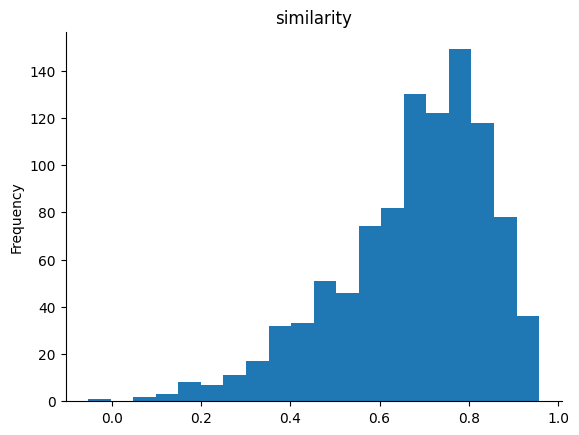

In [13]:
# @title similarity

from matplotlib import pyplot as plt
df_1000['similarity'].plot(kind='hist', bins=20, title='similarity')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [14]:
df_1000[(df_1000['similarity'])>0.7].sample(5)

,en,th,similarity
214,"Нeigh-ho, heigh-ho!\n","เฮ-โฮ, เฮ โฮ!\n",0.700542
407,She can even make herself invisible.\n,เธอยังสามารถทำให้ตัวเองมอง ไม่เห็น\n,0.809597
536,I'll go myself to the dwarfs' cottage in a dis...,ฉันจะไปตัวเองไปที่กระท่อม คนแคระ ' ในการปลอมตั...,0.770212
308,-Was it a dragon?\n,มันเป็นมังกร?\n,0.809527
570,Hey!\n,เฮ้!\n,0.838678


In [15]:
df_1000[(df_1000['similarity'])<0.3].sample(5)

,en,th,similarity
992,What's good about it?\n,นายจะบอกอะไรฉัน\n,0.281816
669,The...\n,เดอะควีนเก่ากลับกลอกหนึ่ง\n,0.077110
898,Don't you know me?\n,เรารู้จักกันหรอ\n,0.249452
932,I shan't need this any more.\n,ฉันก็คิดว่าฉันต้องเลิกแล้ว\n,0.165769
919,I can't reach it.\n,มันล้ำลึกเกินฉันจะเข้าใจ\n,0.203812


## Sentence-BERT

In [16]:
!pip install sentence-transformers

  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc 5.19.1 requires numpy>=1.25.0, but you have numpy 1.24.3 which is incompatible.
tensorflow 2.13.1 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.12.2 which is incompatible.


In [17]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')  # โมเดลขนาดเล็กที่เหมาะสำหรับงานทั่วไป

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [18]:
sentences = ["This is a test sentence.", "This is another example."]
embeddings = model.encode(sentences)
print(embeddings)

[[ 8.42964575e-02  5.79536557e-02  4.49340558e-03  1.05821081e-01
   7.08341785e-03 -1.78446788e-02 -1.68880504e-02 -1.52282696e-02
   4.04730961e-02  3.34225670e-02  1.04327641e-01 -4.70358469e-02
   6.88472297e-03  4.10179831e-02  1.87119897e-02 -4.14923169e-02
   2.36474518e-02 -5.65018281e-02 -3.36962305e-02  5.09909838e-02
   6.93032816e-02  5.47842085e-02 -9.78842750e-03  2.36971751e-02
   1.99966170e-02  9.71730333e-03 -5.88991530e-02  7.30741303e-03
   4.70264964e-02 -4.51011024e-03 -5.57997674e-02 -4.15938860e-03
   6.47571012e-02  4.80762757e-02  1.70208160e-02 -3.18334205e-03
   5.74023835e-02  3.52318622e-02 -5.88394189e-03  1.48329102e-02
   1.15762940e-02 -1.07480749e-01  1.91042349e-02  2.20857468e-02
   1.08645959e-02  3.78193194e-03 -3.19403708e-02  1.07278358e-02
  -4.84230602e-03 -2.83362232e-02 -5.25735840e-02 -7.05868080e-02
  -5.75559027e-02 -1.36328628e-02  5.68220858e-03  2.30746157e-02
   3.56978029e-02  1.49983820e-02  4.97427285e-02  4.26283143e-02
  -3.45888

In [19]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity([embeddings[0]], [embeddings[1]])
print("Similarity:", similarity[0][0])

Similarity: 0.37403136


ทดลองใช้ SBERT เปรียบเทียบโดยใช้ประโยคจากตัวอย่างก่อนหน้า
เปรียบเทียบผลกับ Average Word Embedding และ USE

In [20]:
sentences = [
    "This is an example sentence.",
    "Another sentence for comparison.",
    "A completely different topic.",
    "This sentence is similar to the first one."
]

In [21]:
sentence_encoders= model.encode(sentences)
print(embeddings)

[[ 8.42964575e-02  5.79536557e-02  4.49340558e-03  1.05821081e-01
   7.08341785e-03 -1.78446788e-02 -1.68880504e-02 -1.52282696e-02
   4.04730961e-02  3.34225670e-02  1.04327641e-01 -4.70358469e-02
   6.88472297e-03  4.10179831e-02  1.87119897e-02 -4.14923169e-02
   2.36474518e-02 -5.65018281e-02 -3.36962305e-02  5.09909838e-02
   6.93032816e-02  5.47842085e-02 -9.78842750e-03  2.36971751e-02
   1.99966170e-02  9.71730333e-03 -5.88991530e-02  7.30741303e-03
   4.70264964e-02 -4.51011024e-03 -5.57997674e-02 -4.15938860e-03
   6.47571012e-02  4.80762757e-02  1.70208160e-02 -3.18334205e-03
   5.74023835e-02  3.52318622e-02 -5.88394189e-03  1.48329102e-02
   1.15762940e-02 -1.07480749e-01  1.91042349e-02  2.20857468e-02
   1.08645959e-02  3.78193194e-03 -3.19403708e-02  1.07278358e-02
  -4.84230602e-03 -2.83362232e-02 -5.25735840e-02 -7.05868080e-02
  -5.75559027e-02 -1.36328628e-02  5.68220858e-03  2.30746157e-02
   3.56978029e-02  1.49983820e-02  4.97427285e-02  4.26283143e-02
  -3.45888

In [22]:
SBERT_similarities = []
for i in range(len(sentences)):
    for j in range(i + 1, len(sentences)):
        if sentence_encoders[i] is not None and sentence_encoders[j] is not None:
            similarity = cosine_similarity([sentence_encoders[i]], [sentence_encoders[j]])
            SBERT_similarities += [similarity[0][0]]
            print(f"'{sentences[i]} - {sentences[j]}': {similarity[0][0]}")

'This is an example sentence. - Another sentence for comparison.': 0.47542333602905273
'This is an example sentence. - A completely different topic.': 0.270140677690506
'This is an example sentence. - This sentence is similar to the first one.': 0.6348189115524292
'Another sentence for comparison. - A completely different topic.': 0.3172723054885864
'Another sentence for comparison. - This sentence is similar to the first one.': 0.5522293448448181
'A completely different topic. - This sentence is similar to the first one.': 0.28306636214256287


###เปรียบเทียบโดยใช้ประโยคจากตัวอย่างก่อนหน้า เปรียบเทียบผลกับ Average Word Embedding และ USE

In [38]:
data = []
for i in range(len(sentences)):
    for j in range(i + 1, len(sentences)):
        if sentence_embeddings[i] is not None and sentence_embeddings[j] is not None:
            similarity = cosine_similarity([sentence_embeddings[i]], [sentence_embeddings[j]])
            data.append([sentences[i], sentences[j], similarity[0][0]])  # Append sentences and similarity

df_similarity = pd.DataFrame(data, columns=["Sentence 1", "Sentence 2", "AVG"])  # Create DataFrame

# เพิ่มuseลง DataFrame
df_similarity['USE'] = USE_similarities

# เพิ่ม sbert DataFrame
df_similarity['SBERT'] = SBERT_similarities

df_similarity.head()

,Sentence 1,Sentence 2,AVG,USE,SBERT
0,This is an example sentence.,Another sentence for comparison.,0.494557,0.485554,0.475423
1,This is an example sentence.,A completely different topic.,0.405936,0.173784,0.270141
2,This is an example sentence.,This sentence is similar to the first one.,0.669795,0.554275,0.634819
3,Another sentence for comparison.,A completely different topic.,0.275606,0.238851,0.317272
4,Another sentence for comparison.,This sentence is similar to the first one.,0.771375,0.330281,0.552229


###เปรียบเทียบ
การเปรียบเทียบผลลัพธ์ SBERT ให้ความแม่นยำสูงสุด แต่ก็ใช้ใช้หน่วยความจำ และเวลาในการประมวลผล มากกว่ามากที่สุด ถ้าเลือกใช้ก็คงจะใช้SBERT เพราะ แม่นยำและถ้าข้อความมีความซับซ้อนก็สามารถใช้ได้